## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jet.bmp'
fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

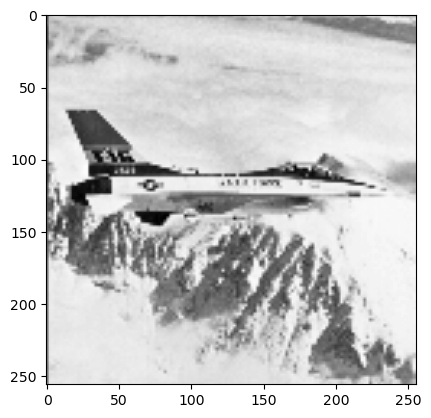

In [2]:
jet = cv2.imread("jet.bmp", cv2.IMREAD_GRAYSCALE)
plt.imshow(jet, cmap='gray')

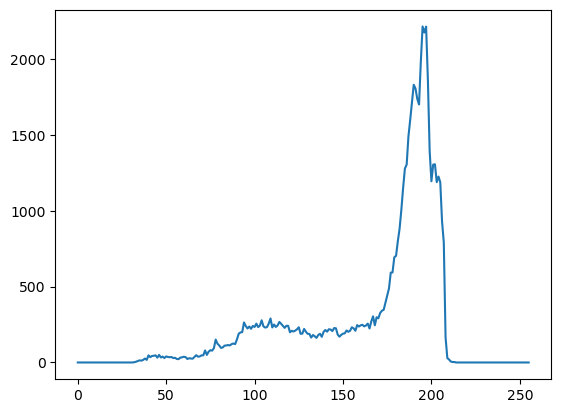

In [3]:
histogram = cv2.calcHist([jet], [0], None, [256], [0,256])
plt.plot(histogram)

### BBHE

In [4]:
avg = jet.mean()
avg

169.29061889648438

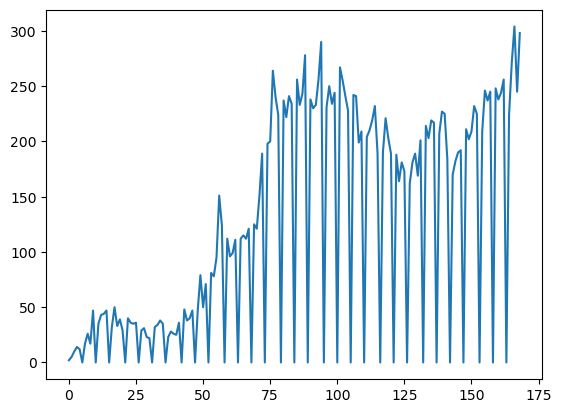

In [5]:
H1 = [x for x in jet.flatten() if x < avg]
H1_hist, _ = np.histogram(H1, bins=int(avg))
plt.plot(H1_hist)

# HERE I FINISHED (and went to sleep)

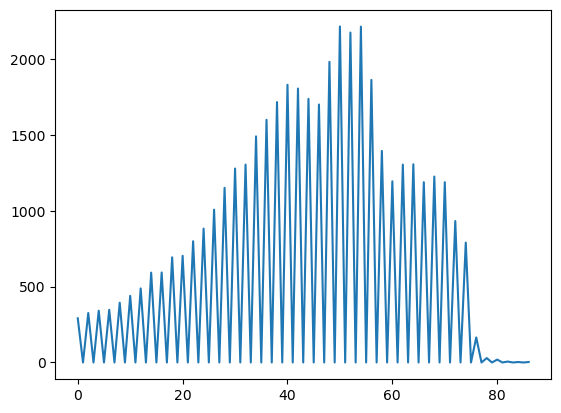

In [6]:
H2 = [x for x in jet.flatten() if x >= avg]
H2_hist, _ = np.histogram(H2, bins=256-int(avg))
plt.plot(H2_hist)

In [7]:
C1 = H1_hist.cumsum() 
C2 = H2_hist.cumsum()

# normalize
C1 = C1 / C1.max()
C2 = C2 / C2.max()

In [8]:
# scale
C1_n = avg * C1
C2_n = avg + 1 + (255-avg-1) * C2 

In [9]:
C_merged = np.concatenate((C1_n, C2_n))
res_img = cv2.LUT(jet, C_merged)

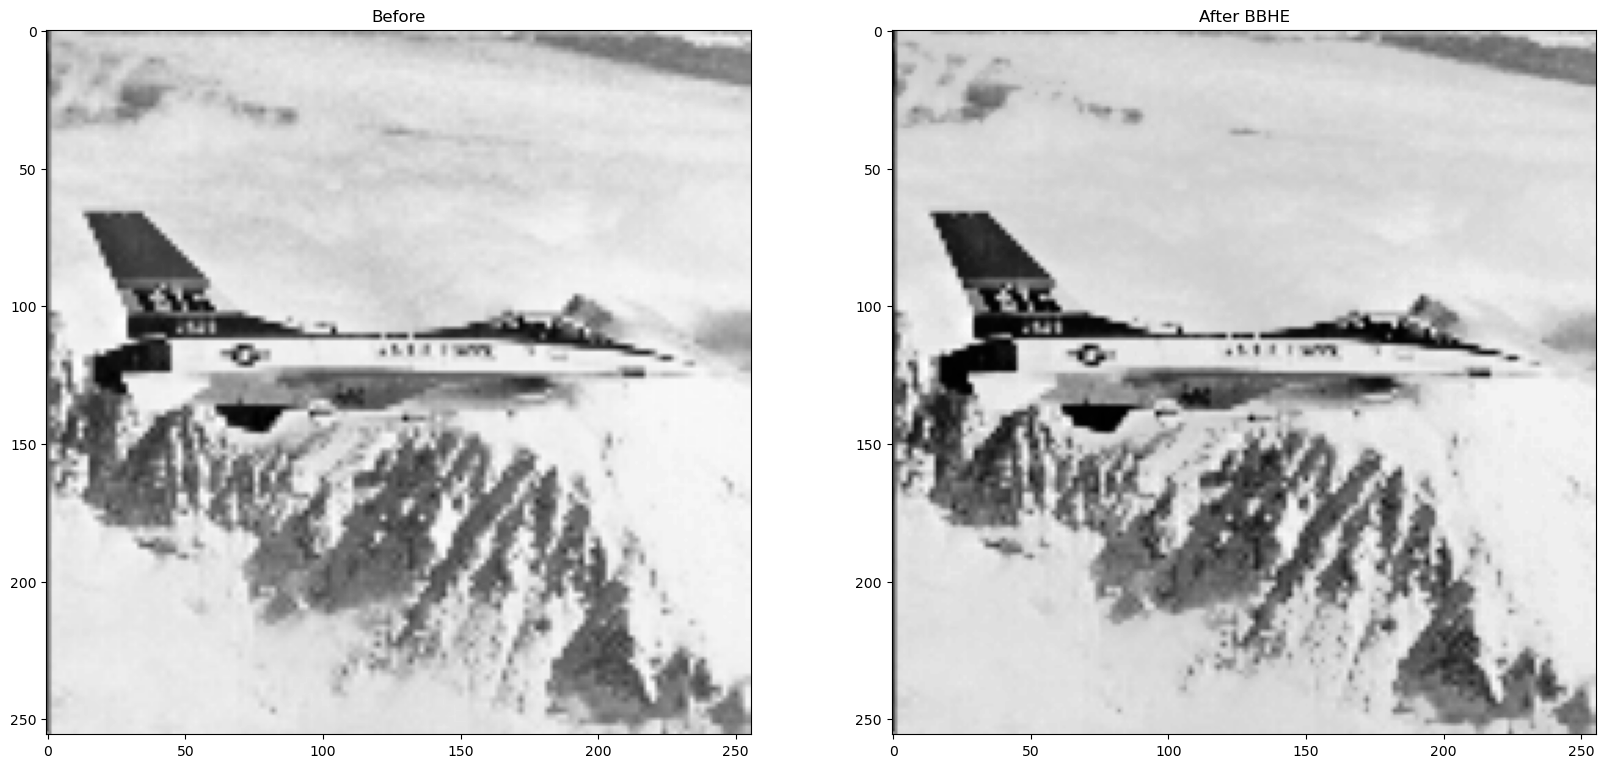

In [10]:
fig ,axs = plt.subplots(1,2)
fig.set_size_inches(20, 10)

axs[0].imshow(jet, cmap='gray')
axs[0].set_title("Before")
axs[1].imshow(res_img, cmap='gray')
axs[1].set_title("After BBHE");

In [11]:
# classic HE
jet_HE = cv2.equalizeHist(jet)

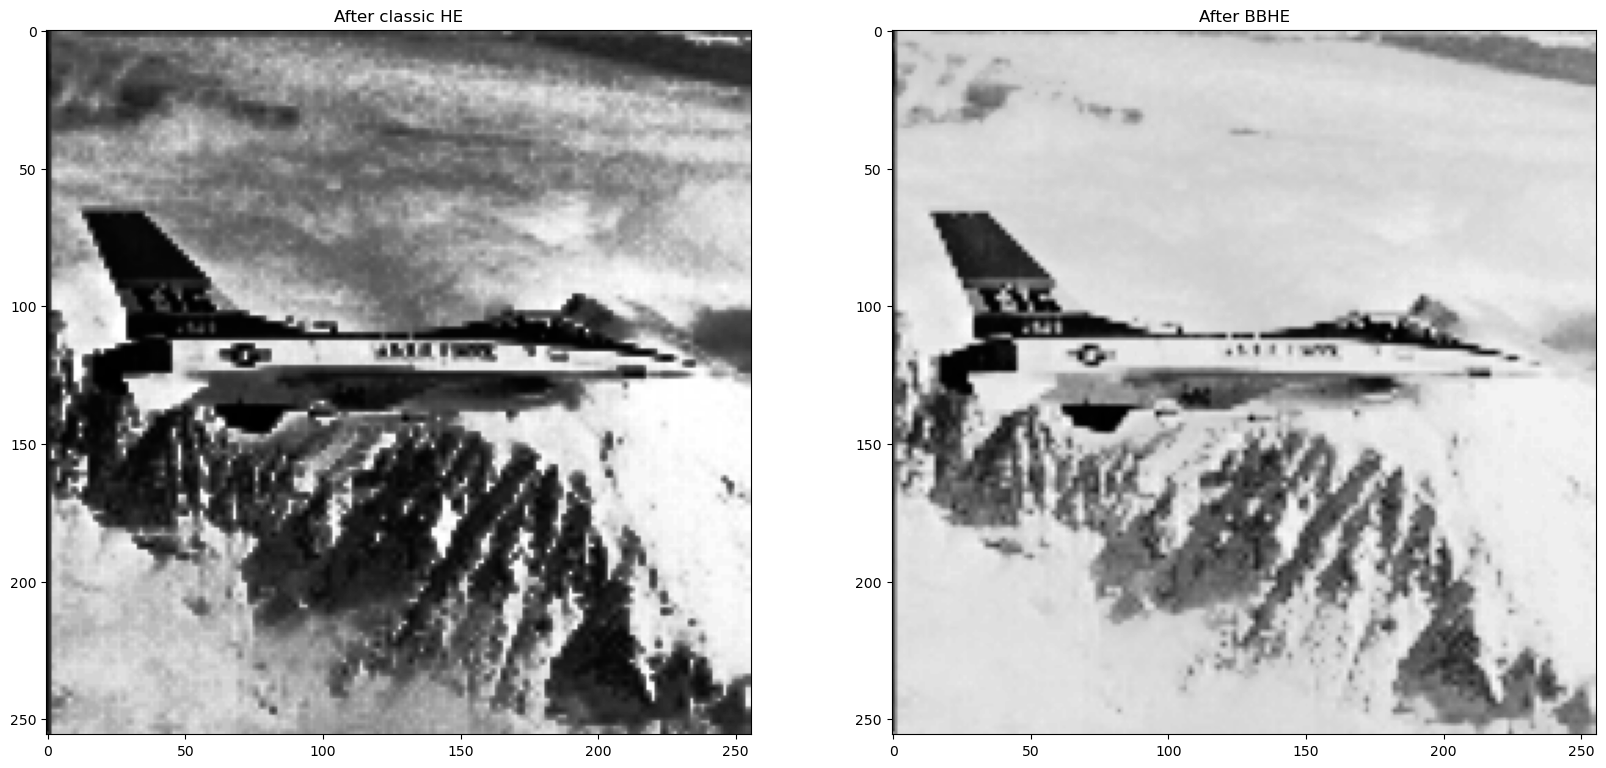

In [12]:
fig ,axs = plt.subplots(1,2)
fig.set_size_inches(20, 10)

axs[0].imshow(jet_HE, cmap='gray')
axs[0].set_title("After classic HE")
axs[1].imshow(res_img, cmap='gray')
axs[1].set_title("After BBHE");